In [18]:
import torch
import numpy as np
import awkward as ak
lf = torch.load("AToGG_pickles_500k_resnet/detfeat.pickle")
lf2 = torch.load("AToGG_pickles_500k_resnet/localfeat.pickle")

In [19]:
lf_ar = [ np.array(i['x']) for i in lf ]
hitsEta = [ np.array(i['x'])[:,0] for i in lf2 ]

In [20]:
hitsiEta = [ i[:,0] for i in lf_ar ]
hitsiPhi = [ i[:,1] for i in lf_ar ]
hitsEn = [ i[:,2] for i in lf_ar ]

In [21]:
seedidx = [np.argmax(i) for i in hitsEn]
relEta = [ i - hitsiEta[event][seedidx[event]] for event,i in enumerate(hitsiEta) ]
relPhi = [ i - hitsiPhi[event][seedidx[event]] for event,i in enumerate(hitsiPhi) ]

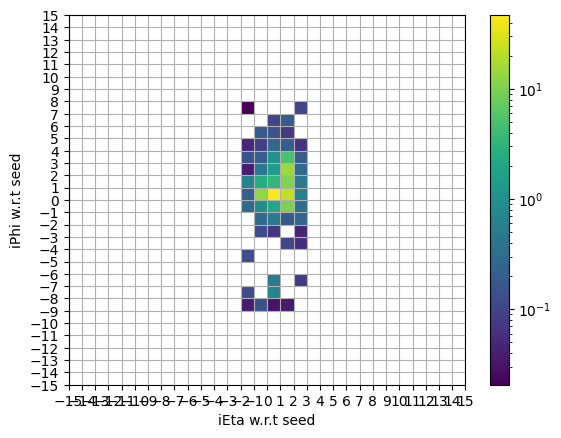

In [22]:
event = 124
import matplotlib.pyplot as plt
x_range = (-15,15)
y_range = (-15,15)

ax = plt.axes()
x_bins = np.arange(x_range[0], x_range[1] + 1, 1)  # Bin edges for x-axis
y_bins = np.arange(y_range[0], y_range[1] + 1, 1) 
ax.set_xticks(x_bins)
ax.set_yticks(y_bins)
plt.hist2d(relEta[event].round(),relPhi[event].round(),weights=hitsEn[event],bins=[x_bins,y_bins],norm='log')
plt.xlabel("iEta w.r.t seed")
plt.ylabel("iPhi w.r.t seed")
#plt.xlim(-6,6)

plt.grid()
plt.colorbar()

In [27]:
dim = 24
imgf = []
length = len(hitsEn)
for event in range(length):
    image = np.zeros((2,dim,dim))
    etaidx = np.clip(int(dim/2) + relEta[event].round().astype(int),0,dim-1)
    phiidx = np.clip(int(dim/2) - relPhi[event].round().astype(int),0,dim-1)
    
    theta = 2*np.arctan(np.exp(-1*hitsEta[event]))
    image[ 0,phiidx,etaidx ] = hitsEn[event]*np.sin(theta)
    image[ 1,phiidx,etaidx ] = hitsEn[event]*np.abs(np.cos(theta))
    imgf.append(image)
len(imgf)

10000

In [28]:
from torch_geometric.data import Data
import torch
data = [
        Data(x=torch.from_numpy(ak.to_numpy(Pho).astype(np.float32))) for Pho in imgf
    ]
torch.save(data, open('cartfeat.pickle','wb'), pickle_protocol=4)

(array([[2247.,  157.,    0., ...,    0.,    0.,    0.],
        [   0., 2419., 1547., ...,    0.,    0.,    0.],
        [   0.,    0., 2191., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ...,    0.,    0., 4239.],
        [   0.,    0.,    0., ...,    0.,    0., 4097.],
        [   0.,    0.,    0., ...,    0.,    0., 2486.]]),
 array([-0.54713613, -0.50525068, -0.46336524, -0.42147979, -0.37959434,
        -0.3377089 , -0.29582345, -0.253938  , -0.21205256, -0.17016711,
        -0.12828166, -0.08639622, -0.04451077, -0.00262533,  0.03926012,
         0.08114557,  0.12303101,  0.16491646,  0.20680191,  0.24868735,
         0.2905728 ,  0.33245824,  0.37434369,  0.41622914,  0.45811458,
         0.50000003,  0.54188548,  0.58377092,  0.62565637,  0.66754182,
         0.70942726,  0.75131271,  0.79319815,  0.8350836 ,  0.87696905,
         0.91885449,  0.96073994,  1.00262539,  1.04451083,  1.08639628,
         1.12828172,  1.17016717,  1.21205262,  1.25393806,

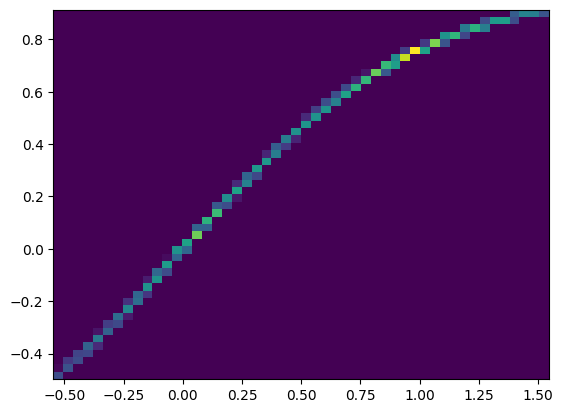

In [ ]:
eta = []
theta = []
for i in range(0,10000):
    eta.extend(hitsEta[i])    
    theta.extend(np.cos(2*np.arctan(np.exp(-1*hitsEta[i]))))    
plt.hist2d(eta,theta,bins=50)


In [ ]:
split = 0.8
length= len(data)
print(length)
train_idx = np.random.choice(length, int(split * length + 0.5), replace=False)

mask = np.ones(length, dtype=bool)
mask[train_idx] = False
valid_idx = mask.nonzero()[0]
folder = "AToGG_pickles_500k_resnet"
with open("%s/all_valididx.pickle" % folder, "wb") as f:
    pickle.dump(valid_idx, f)

with open("%s/all_trainidx.pickle" % folder, "wb") as f:
    pickle.dump(train_idx, f)
with open("%s/all_valididx.pickle" % folder, "wb") as f:
    pickle.dump(valid_idx, f)

1.5707963267948966